In [107]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [64]:
def initilization():
    df = pd.read_csv("UCI_Credit_Card.csv")
    return df

In [51]:
df = pd.read_csv("UCI_Credit_Card.csv")

In [52]:
df.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,2,2,1,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,2,2,2,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,2,2,2,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,2,2,1,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,1,2,1,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


In [4]:
df.describe()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
count,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,30000.000000,...,30000.000000,30000.000000,30000.000000,30000.000000,3.000000e+04,30000.00000,30000.000000,30000.000000,30000.000000,30000.000000
mean,15000.500000,167484.322667,1.603733,1.853133,1.551867,35.485500,-0.016700,-0.133767,-0.166200,-0.220667,...,43262.948967,40311.400967,38871.760400,5663.580500,5.921163e+03,5225.68150,4826.076867,4799.387633,5215.502567,0.221200
std,8660.398374,129747.661567,0.489129,0.790349,0.521970,9.217904,1.123802,1.197186,1.196868,1.169139,...,64332.856134,60797.155770,59554.107537,16563.280354,2.304087e+04,17606.96147,15666.159744,15278.305679,17777.465775,0.415062
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.00000,0.000000,0.000000,0.000000,0.000000
25%,7500.750000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2326.750000,1763.000000,1256.000000,1000.000000,8.330000e+02,390.00000,296.000000,252.500000,117.750000,0.000000
50%,15000.500000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19052.000000,18104.500000,17071.000000,2100.000000,2.009000e+03,1800.00000,1500.000000,1500.000000,1500.000000,0.000000
75%,22500.250000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54506.000000,50190.500000,49198.250000,5006.000000,5.000000e+03,4505.00000,4013.250000,4031.500000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.00000,621000.000000,426529.000000,528666.000000,1.000000


In [9]:
dfp = df

## Preprocessing stage

In [98]:
def preprocess(df):
    dfp = df
    
    
    dfp.loc[dfp["SEX"] == 1,"SEX" ] = "male"
    dfp.loc[dfp["SEX"] == 2,"SEX" ] = "female"
    
    
    dfp.loc[dfp["MARRIAGE"] == 0,"MARRIAGE" ] = "unknown"
    dfp.loc[dfp["MARRIAGE"] == 1,"MARRIAGE" ] = "married"
    dfp.loc[dfp["MARRIAGE"] == 2,"MARRIAGE" ] = "single"
    dfp.loc[dfp["MARRIAGE"] == 3,"MARRIAGE" ] = "others"
    
    
    
    dfp.loc[dfp["EDUCATION"] == 1,"EDUCATION" ] = "graduate"
    dfp.loc[dfp["EDUCATION"] == 2,"EDUCATION" ] = "under graduate"
    dfp.loc[dfp["EDUCATION"] == 3,"EDUCATION" ] = "high school"
    dfp.loc[dfp["EDUCATION"] == 4,"EDUCATION" ] = "others"
    dfp.loc[dfp["EDUCATION"] == 5,"EDUCATION" ] = "unknown"
    dfp.loc[dfp["EDUCATION"] == 6,"EDUCATION" ] = "unknown"  
    dfp.loc[dfp["EDUCATION"] == 0,"EDUCATION" ] = "unknown"  

    dfp.rename(columns={'PAY_0':'PAY_1'}, inplace=True)
                          
                 
    return dfp



In [99]:
df = initilization()
dfp = preprocess(df)

In [100]:
dfp.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_1,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,female,under graduate,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,under graduate,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,under graduate,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,under graduate,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,under graduate,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


## Exploration of data for insights

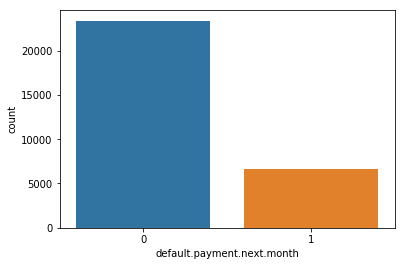

In [68]:
ax = sns.countplot(x="default.payment.next.month", data=dfp)

In [69]:
print("percentage of defaulters:",dfp["default.payment.next.month"].sum()/300)

percentage of defaulters: 22.12


### We can observe that only 22 % of 30,000 credit card holders are defaulting next month

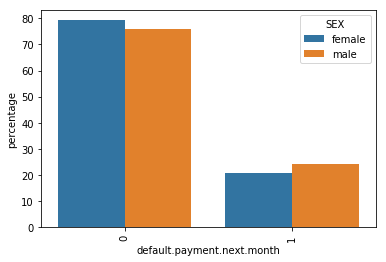

In [70]:
occupation_counts = (dfp.groupby(['SEX'])['default.payment.next.month']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('default.payment.next.month'))
p = sns.barplot(x="default.payment.next.month", y="percentage", hue="SEX", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

### We can observe that male and female population sample are equally likely to default the credit card amount and there is no noticable difference between them

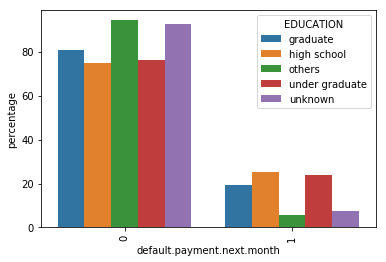

In [71]:
occupation_counts = (dfp.groupby(['EDUCATION'])['default.payment.next.month']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('default.payment.next.month'))
p = sns.barplot(x="default.payment.next.month", y="percentage", hue="EDUCATION", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

### We can observe that the defaulter percentage varies across different education levels

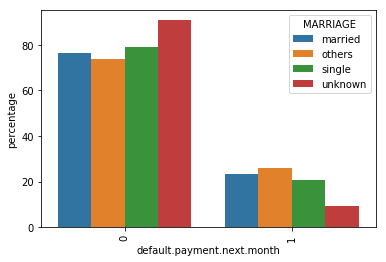

In [72]:
occupation_counts = (dfp.groupby(['MARRIAGE'])['default.payment.next.month']
                     .value_counts(normalize=True)
                     .rename('percentage')
                     .mul(100)
                     .reset_index()
                     .sort_values('default.payment.next.month'))
p = sns.barplot(x="default.payment.next.month", y="percentage", hue="MARRIAGE", data=occupation_counts)
_ = plt.setp(p.get_xticklabels(), rotation=90)  # Rotate labels

### We can observe that the marital status has an effect on defaulter percentage

In [73]:
dfp.head()

,ID,LIMIT_BAL,SEX,EDUCATION,MARRIAGE,AGE,PAY_0,PAY_2,PAY_3,PAY_4,...,BILL_AMT4,BILL_AMT5,BILL_AMT6,PAY_AMT1,PAY_AMT2,PAY_AMT3,PAY_AMT4,PAY_AMT5,PAY_AMT6,default.payment.next.month
0,1,20000.0,female,under graduate,married,24,2,2,-1,-1,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1
1,2,120000.0,female,under graduate,single,26,-1,2,0,0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1
2,3,90000.0,female,under graduate,single,34,0,0,0,0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0
3,4,50000.0,female,under graduate,married,37,0,0,0,0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0
4,5,50000.0,male,under graduate,married,57,-1,0,-1,0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0


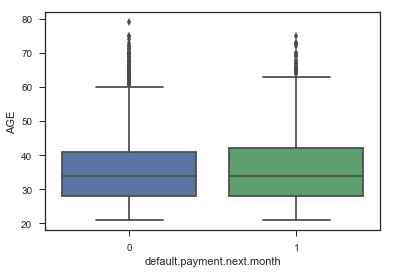

In [96]:
sns.boxplot(x='default.payment.next.month', y="AGE", data=dfp)

dfdefaulter = dfp[dfp["default.payment.next.month"] == 1]
dfnondefaulter = dfp[dfp["default.payment.next.month"] == 0]

In [92]:
dfdefaulter.shape

(6636, 25)

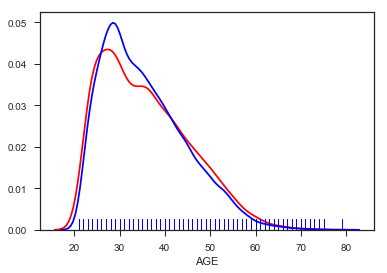

In [97]:
sns.distplot(dfdefaulter["AGE"],hist=False, rug=True,color = 'r')
sns.distplot(dfnondefaulter["AGE"],hist=False, rug=True,color = 'b')

### We can observe that most of the credit cards were given to a people of age group between 25-40

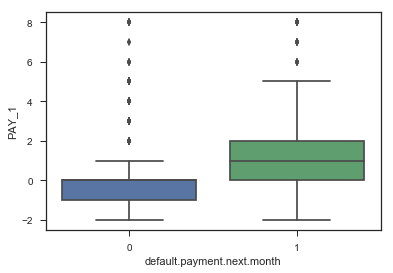

In [101]:
sns.boxplot(x='default.payment.next.month', y="PAY_1", data=dfp)

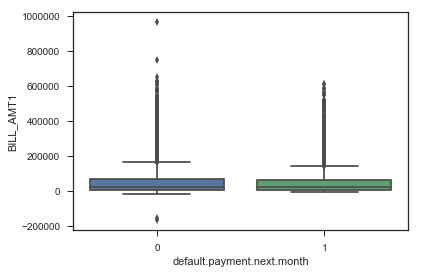

In [102]:
sns.boxplot(x='default.payment.next.month', y="BILL_AMT1", data=dfp)

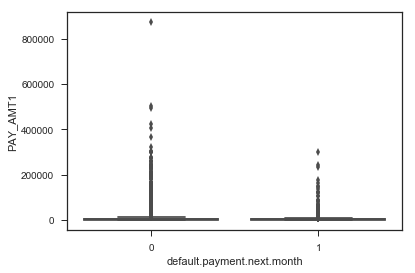

In [103]:
sns.boxplot(x='default.payment.next.month', y="PAY_AMT1", data=dfp)

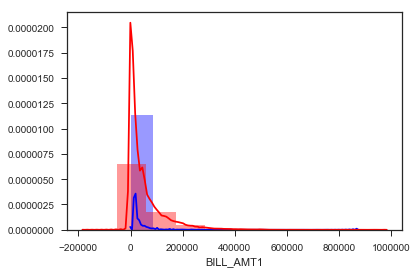

In [113]:
sns.distplot(dfp["PAY_AMT1"], hist=True, kde=True,bins=10,color='b')
sns.distplot(dfp["BILL_AMT1"], hist=True, kde=True,bins=10,color= 'r')


In [114]:
dfp["PAY_AMT1"].min()

0.0

In [115]:
dfp["BILL_AMT1"].min()

-165580.0

In [116]:
dfp["BILL_AMT1"].max()

964511.0

## Feature engineering with full data and resampling data

## Model building with full data and resampling data

## ROC for different values of Logistic Regression thresholds